# Data Cleaning of VideoGame Sales
In this mini-project, I aim to clean the "vgsales.csv" file and create a few graphs
A couple questions I have are:<br>
1)Do regions have publisher preferences<br>
2)Do regions have genre preferences<br>
3)Has total video-game sales increased over the years<br>
4)How has each platform performed over the years<br>
5)Which year was the most successful<br>
I will also attempt to see if you can use platform, publisher and genre to predict sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading File and Checking Characteristics

In [3]:
df=pd.read_csv("vgsales.csv")
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5

# Data Cleaning
We can see that the columns, Year and publisher have a couple null values that we will have to deal with. I will also check for duplicates.

I noticed that the entries at indexes 179 and 377 were incorrect and decided to replace them instead of deleting the rows

In [5]:
df.loc[179, "Year"]=2004
df.loc[377, "Year"]=2004

Now I will delete replace the rest of the null values in the Year column with the mean year which was 2006, and delete all null entries in Publisher column

In [6]:
df.fillna({"Year":2006}, inplace=True)
df.dropna(subset=["Publisher"],inplace=True)

Now I will check if the dataframe contains any duplicated entries

In [7]:
d=df.duplicated()
for x in df.index:
    if d[x]:
        print(x,d[x])

# Data Visualization

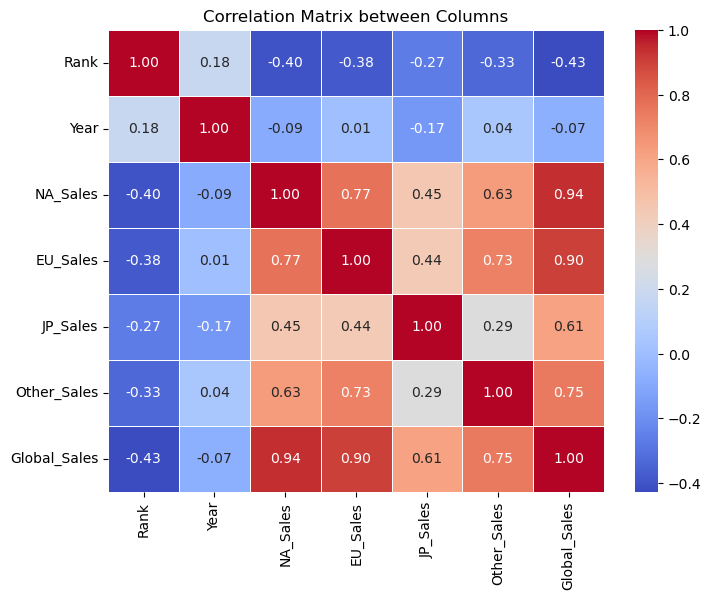

In [8]:
import seaborn as sns

Correlation_Matrix=df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(Correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Columns")
plt.show()

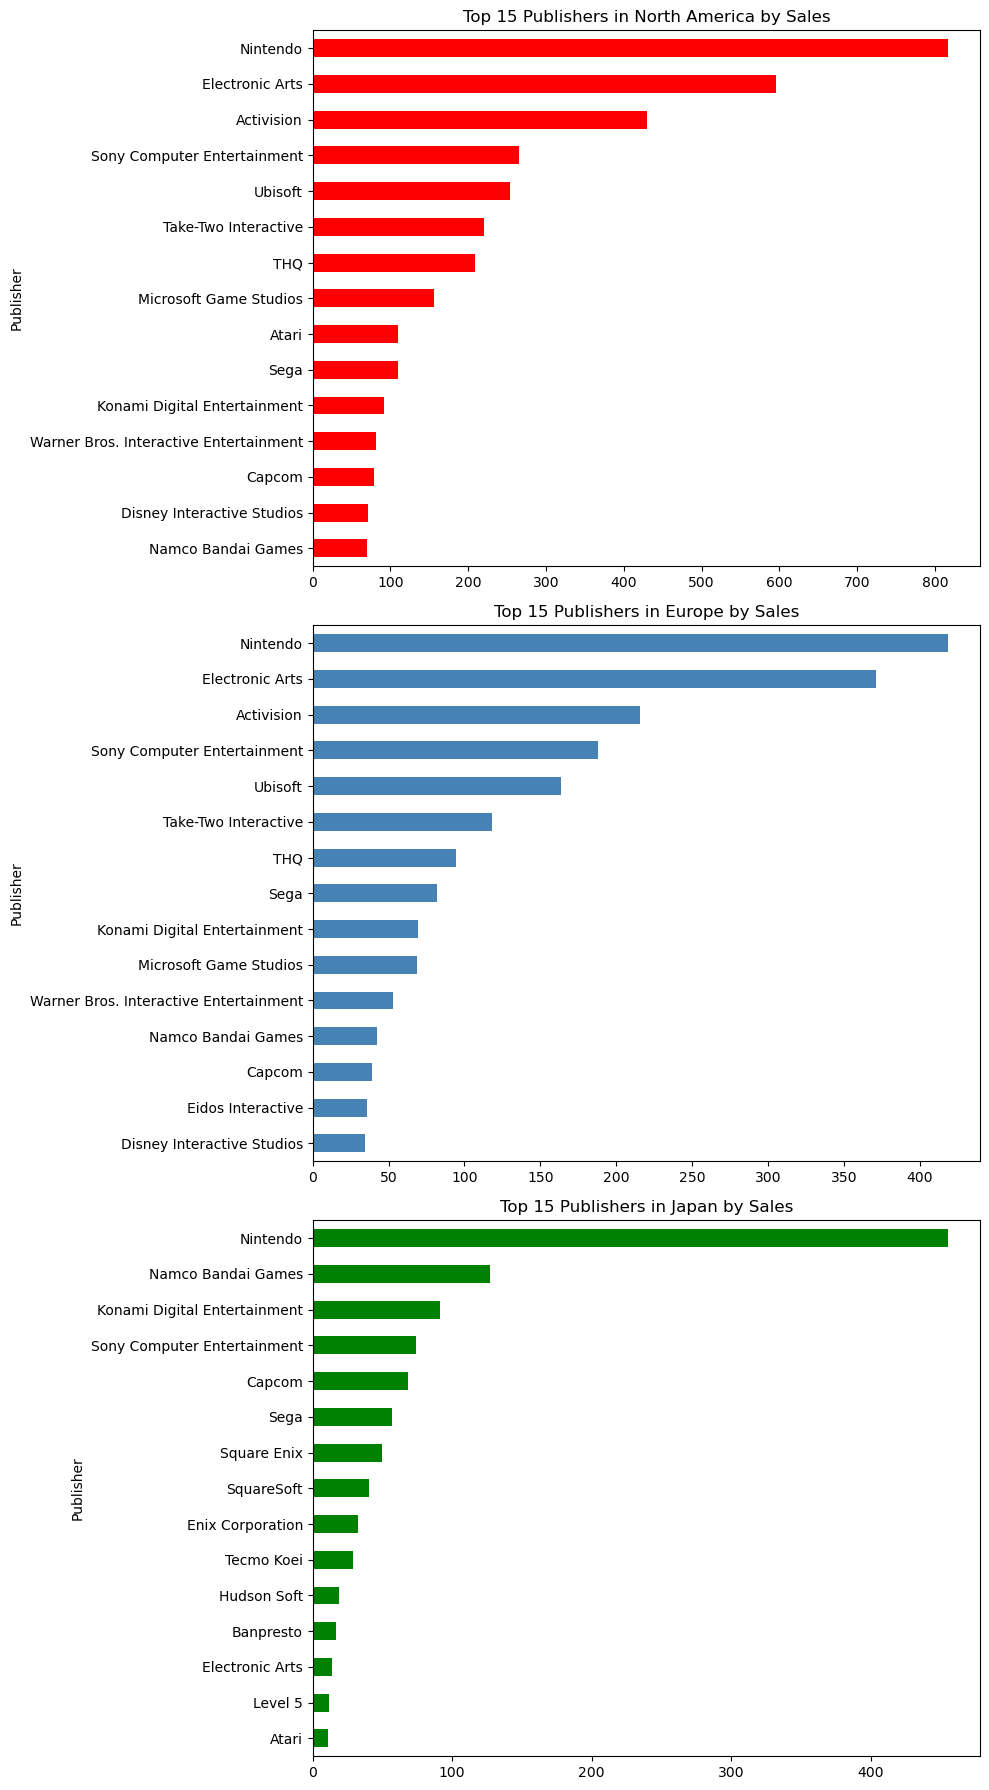

In [9]:
import matplotlib.pyplot as plt

# Create a 3-row, 1-column subplot layout
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # taller figsize to prevent overlap

# Plot 1: North America
top_publishers_NA = df.groupby("Publisher")["NA_Sales"].sum().nlargest(15)
top_publishers_NA.sort_values().plot(kind="barh", color="red", ax=axes[0], title="Top 15 Publishers in North America by Sales")

# Plot 2: Europe
top_publishers_EU = df.groupby("Publisher")["EU_Sales"].sum().nlargest(15)
top_publishers_EU.sort_values().plot(kind="barh", color="steelblue", ax=axes[1], title="Top 15 Publishers in Europe by Sales")

# Plot 3: Japan
top_publishers_JP = df.groupby("Publisher")["JP_Sales"].sum().nlargest(15)
top_publishers_JP.sort_values().plot(kind="barh", color="green", ax=axes[2], title="Top 15 Publishers in Japan by Sales")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


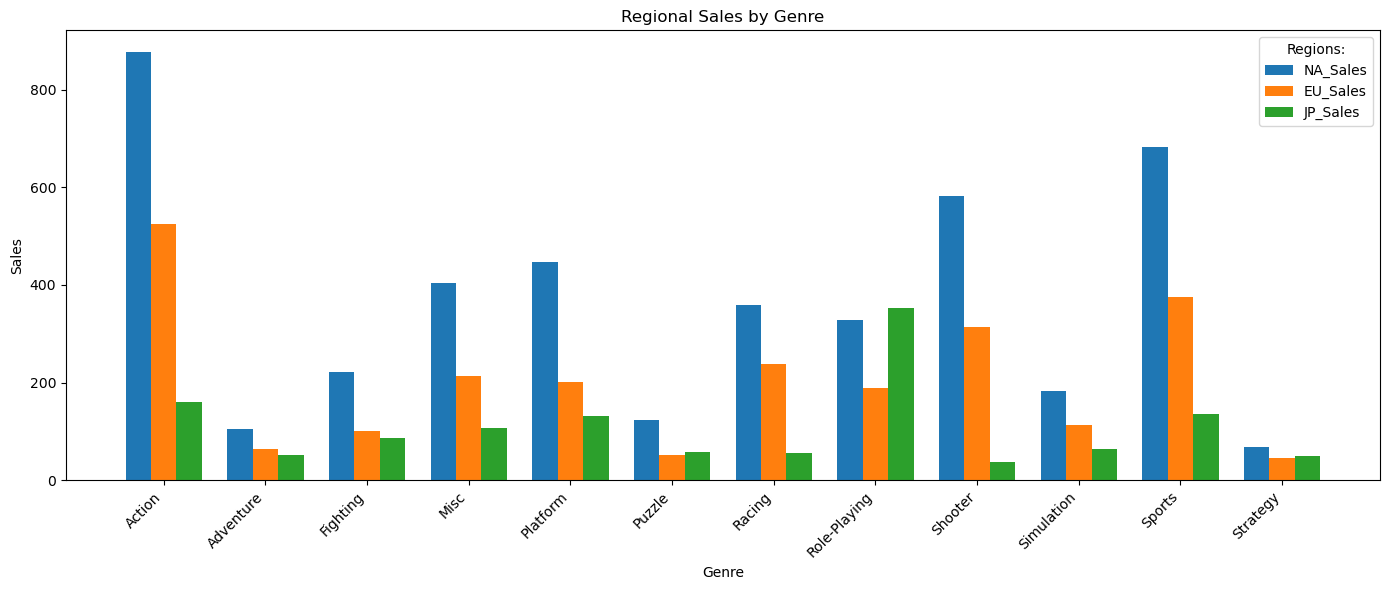

In [10]:
# Group and prepare data
grouped = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()
genres = grouped.index
regions = grouped.columns
x = np.arange(len(genres))
bar_width = 0.25

# Plot
plt.figure(figsize=(14, 6))
for i, region in enumerate(regions):
    plt.bar(x + i * bar_width, grouped[region], width=bar_width, label=region)

plt.xticks(x + bar_width, genres, rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.title("Regional Sales by Genre")
plt.legend(title = "Regions:")
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Global Sales per Year'}, xlabel='Year'>

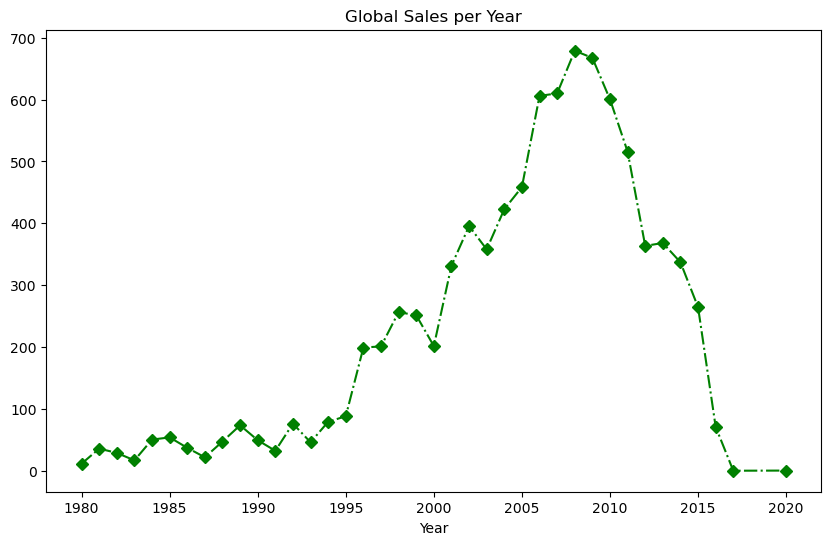

In [11]:
Sales_per_year = df.groupby("Year")["Global_Sales"].sum()
Sales_per_year.plot(style='D-.g', figsize=(10,6), title='Global Sales per Year')

In [12]:
x=df["Platform"].unique()
print(x)
print("\n")
print(len(x))

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


31


<Axes: title={'center': 'Sales by Platforms'}, xlabel='Platform'>

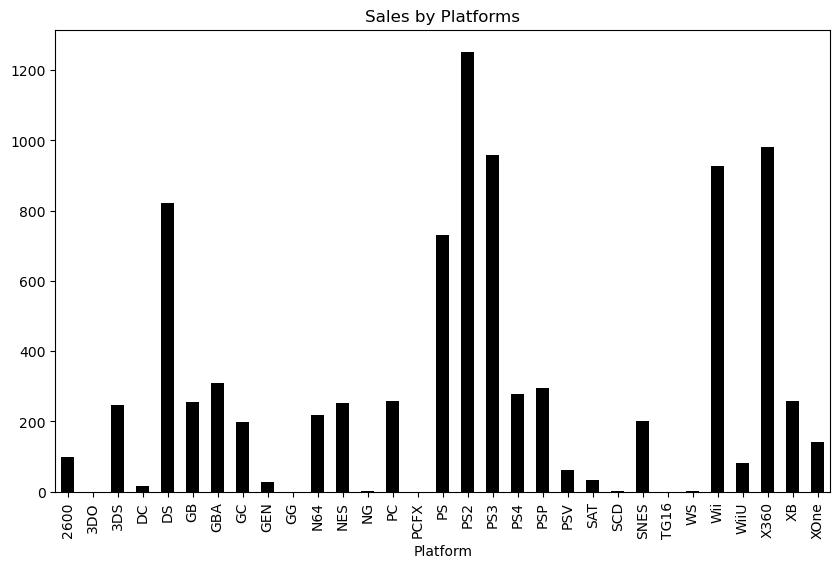

In [13]:
sys = df.groupby("Platform")["Global_Sales"].sum()
sys.plot(kind="bar", figsize=(10,6), color="Black", title="Sales by Platforms")

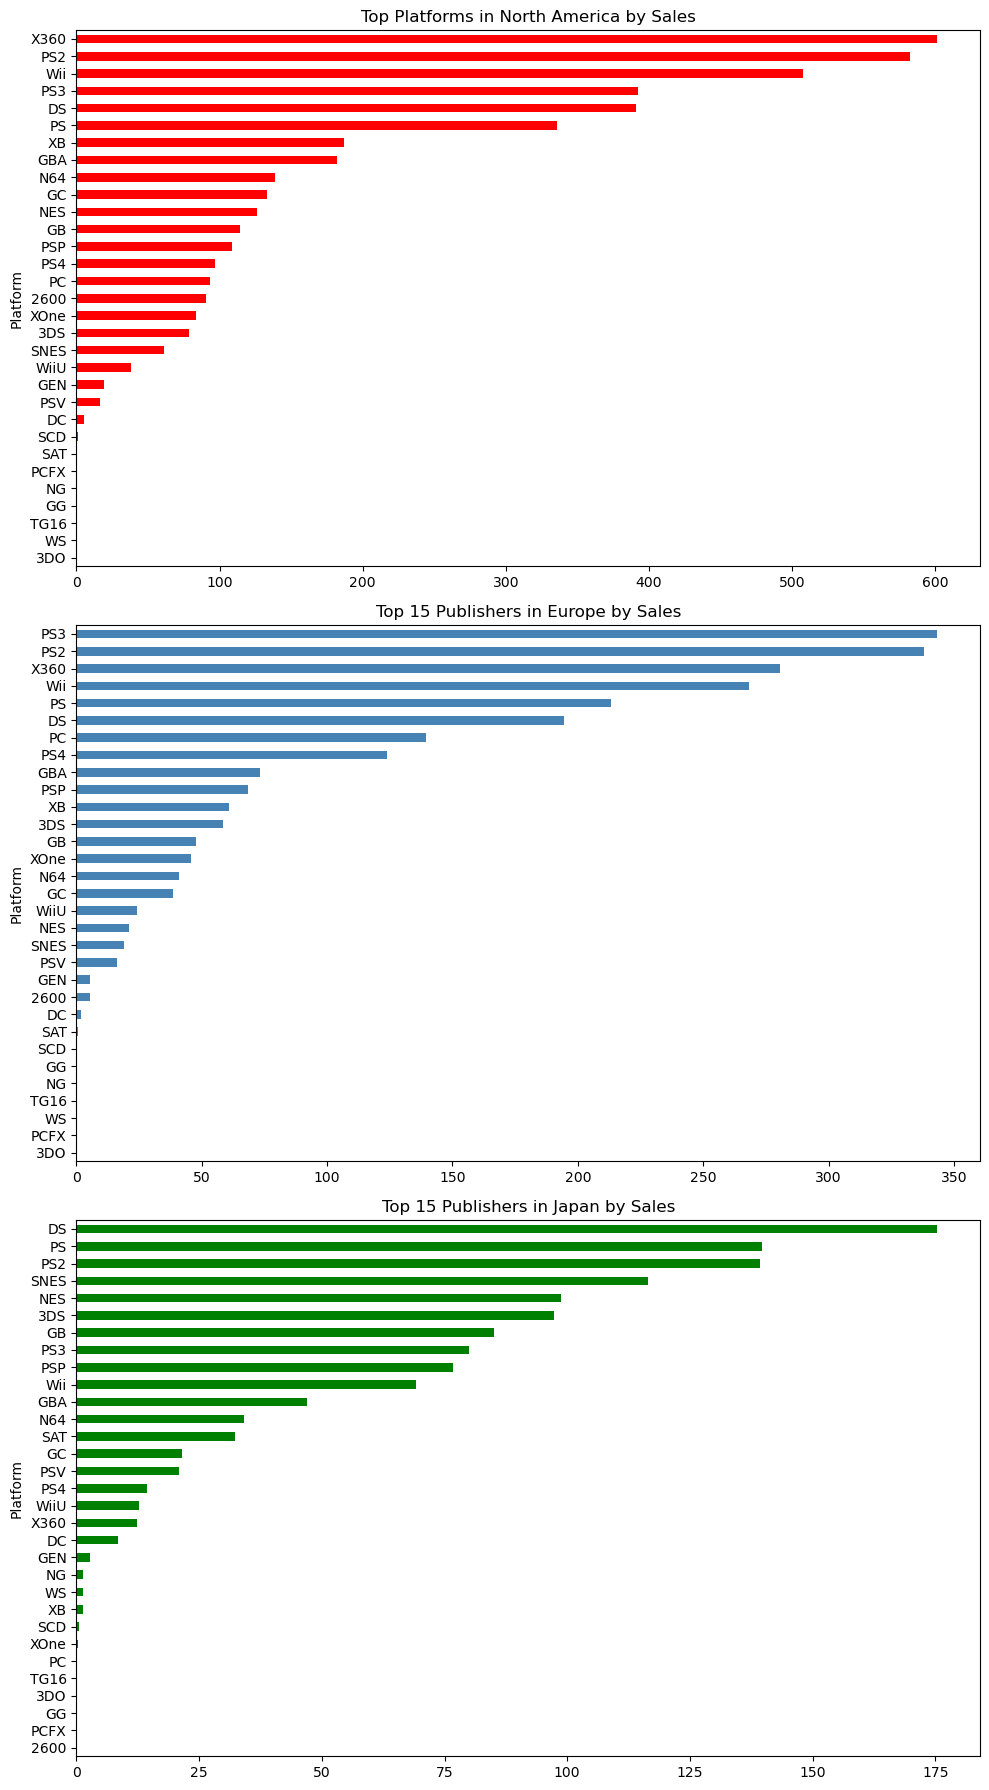

In [14]:
import matplotlib.pyplot as plt

# Create a 3-row, 1-column subplot layout
fig, axes = plt.subplots(3, 1, figsize=(10, 18))  # taller figsize to prevent overlap

# Plot 1: North America
platform_NA = df.groupby("Platform")["NA_Sales"].sum()
platform_NA.sort_values().plot(kind="barh", color="red", ax=axes[0], title="Top Platforms in North America by Sales")

# Plot 2: Europe
platform_EU = df.groupby("Platform")["EU_Sales"].sum()
platform_EU.sort_values().plot(kind="barh", color="steelblue", ax=axes[1], title="Top 15 Publishers in Europe by Sales")

# Plot 3: Japan
platform_JP = df.groupby("Platform")["JP_Sales"].sum()
platform_JP.sort_values().plot(kind="barh", color="green", ax=axes[2], title="Top 15 Publishers in Japan by Sales")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


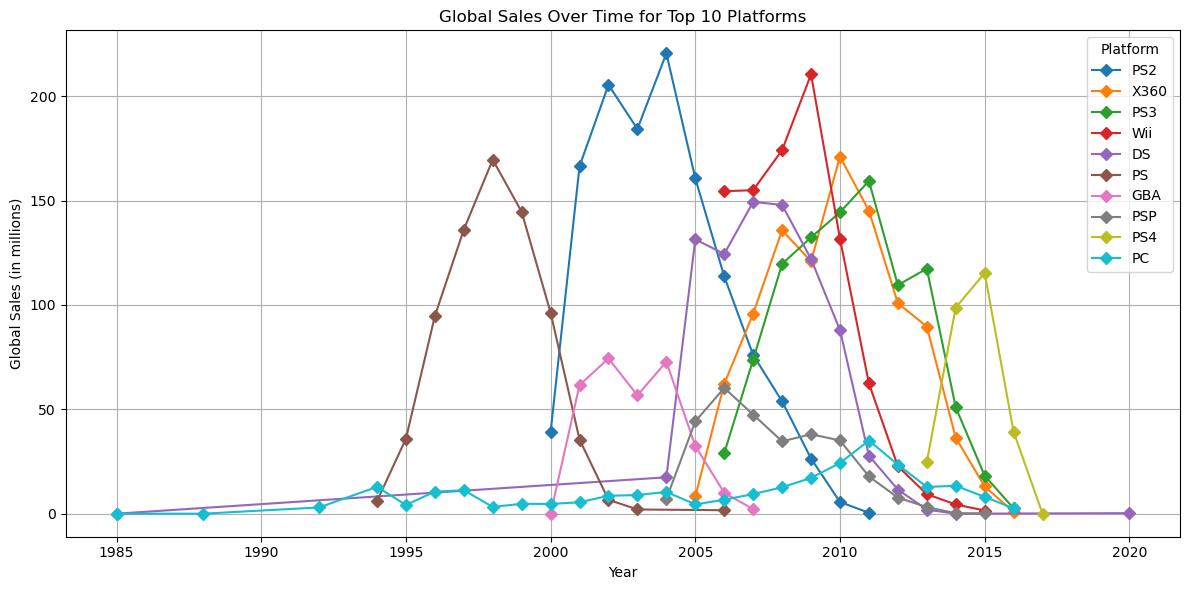

In [47]:
import matplotlib.pyplot as plt

# Get top 6 platforms by total global sales
top_platforms = df.groupby("Platform")["Global_Sales"].sum().nlargest(10).index

plt.figure(figsize=(12, 6))

# Loop through each platform and plot its sales over time
for platform in top_platforms:
    sales = df[df["Platform"] == platform]
    sales_by_year = sales.groupby("Year")["Global_Sales"].sum().sort_index()
    plt.plot(sales_by_year.index, sales_by_year.values, marker="D", label=platform)

# Finalize plot
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Global Sales Over Time for Top 10 Platforms")
plt.legend(title="Platform")
plt.grid(True)
plt.tight_layout()
plt.show()


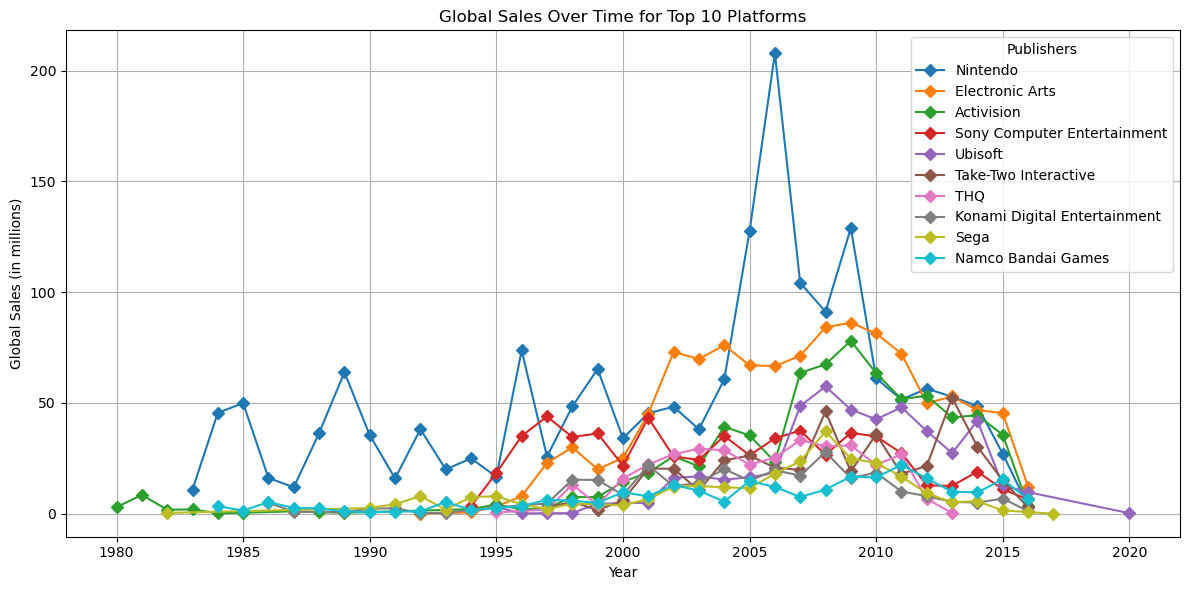

In [48]:
import matplotlib.pyplot as plt

# Get top 5 platforms by total global sales
top_publishers = df.groupby("Publisher")["Global_Sales"].sum().nlargest(10).index

plt.figure(figsize=(12, 6))

# Loop through each platform and plot its sales over time
for publisher in top_publishers:
    sales = df[df["Publisher"] == publisher]
    sales_by_year = sales.groupby("Year")["Global_Sales"].sum().sort_index()
    plt.plot(sales_by_year.index, sales_by_year.values, marker="D", label=publisher)

# Finalize plot
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.title("Global Sales Over Time for Top 10 Platforms")
plt.legend(title="Publishers")
plt.grid(True)
plt.tight_layout()
plt.show()


# Key Findings
1)By looking at the top 15 publishers in each region, we can seee that their are regional preferences towards publishers. This does not mean there is a correlation but a linear regression model may be able to provide more insight.<br><br> 2)We can see that action, shooters and sports games are the most popular in NA and EU while role-playing, action and platform games dominate the JP market.<br><br> 3)From 1980-2020, global sales have increased, peaking in aroun 2009-2010, and then steadily decreasing again. <br><br> 4)The top platforms overall were the PS2, PS3, XBOX 360,WII and DS. When dissecting by regions, we usually see this reflected except in Japan where the XBOX360 seemingly underperformed.We can further see that the PS2 had the greatsest peak in global sales and was the top dog from 2001-2005. The next highest peak was the WII but this lasted for just one year and in terms on longevitiy on the market, the DS takes that from 1985-2020. Sony's PS3 massively underperformed in relation to the PS2 and we see this refelcted on the line graph, this could have been due to the release of Microsoft's XBOX360 which outperformed the PS3 most years in addition to competition from Nintendo's WII and DS.Extending to the top 10 platforms, we see the PS4 start to take over around 2014 while the XBOX One doesn't make the list. Thus, we could conclude that Sony bounced back with the PS4 release while Microsoft's XBOX One didn't live up to the 360.<br><br>5) It was also seen that the top publishers have generally had the same success with global sales over the years with the exception of Nintendo, who often broke away from the pact most noticably between 2005-2009 which could be attributed to the success of the WII